In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data processing

In [2]:
train=pd.read_csv(r'F:\pratique\titanic\trainTitanic.csv')
test=pd.read_csv(r'F:\pratique\titanic\testTitanic.csv')

In [376]:
SubGen=pd.read_csv(r'F:\pratique\titanic\gender_submission.csv')

In [377]:
SubGen

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


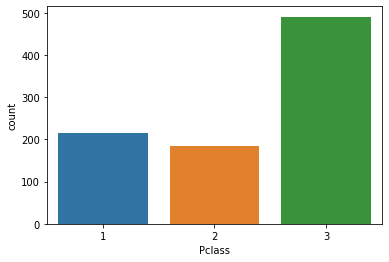

In [4]:
sns.countplot(x=train['Pclass'] )

In [85]:
seab=train[['Survived', 'Pclass']].reset_index().pivot_table( index='Pclass', columns='Survived', aggfunc=[ 'count'])
seab['som']=seab['count'].sum(axis=1)
seab['pc_0']=100*seab['count']['index'][0]/(seab['som'])
seab['pc_1']=100-seab['pc_0']
seab
#seab['Non_Survived']=seab['Survived']['count']-seab['Survived']['sum']

count       som       pc_0       pc_1
         index                                
Survived     0    1                           
Pclass                                        
1           80  136  216  37.037037  62.962963
2           97   87  184  52.717391  47.282609
3          372  119  491  75.763747  24.236253

In [66]:
seab

count            pc_0       pc_1
         index                           
Survived     0    1                      
Pclass                                   
1           80  136  37.037037  62.962963
2           97   87  52.717391  47.282609
3          372  119  75.763747  24.236253

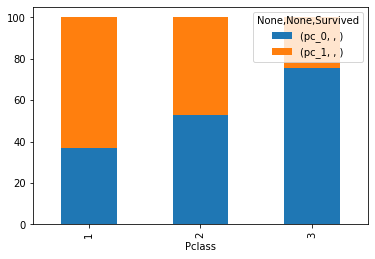

In [86]:
seab[['pc_0', 'pc_1']].plot(kind='bar', stacked=True)


In [72]:
te_sea=train[['Survived', 'Pclass']].groupby('Pclass').count()
te_sea

,Survived
Pclass,
1,216
2,184
3,491


TypeError: cannot unpack non-iterable AxesSubplot object

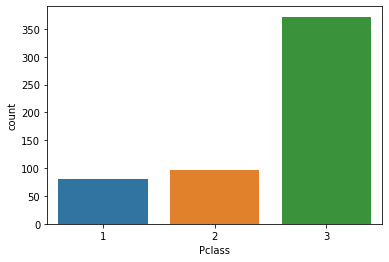

In [60]:
#plt.subplots()
#sns.countplot(x=train[train['Survived']==1]['Pclass'] )
fig, ax=sns.countplot(x=train[train['Survived']==0]['Pclass'])
ax.set(xlable='class')
sns.despine(left=True, bottom=True)

In [34]:
y_train=train['Survived']
data=[train, test]
print(train.shape, test.shape)

(891, 12) (418, 11)


In [146]:
data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
for i in range(2):
    data[i]['Title']=data[i]['Name'].str.extract(r'(\w+)\.')
    data[i].drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [36]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


### Knn for missing values

In [62]:
test_miss=train.drop('Survived', axis=1)

In [45]:
test_miss_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,female,38.0,1,0,71.2833,C,Mrs
2,3,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,female,35.0,1,0,53.1000,S,Mrs
4,5,3,male,35.0,0,0,8.0500,S,Mr


In [46]:
SexMap={'male':0, 'female':1}
EmbarkedMap={'C':2, 'Q':1, 'S':0}
TitleMap={'Mr': 0, 'Mrs':4, 'Miss':3, 'Master':2, 'rare':1}
test_miss_data['Title']=test_miss_data['Title'].map(TitleMap)
test_miss_data['Sex']=test_miss_data['Sex'].map(SexMap)
test_miss_data['Embarked']=test_miss_data['Embarked'].map(EmbarkedMap)
test_miss_data['Pclass']=test_miss_data['Pclass'].apply(lambda x: 3-x)

In [47]:
test_miss_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,0,22.0,1,0,7.2500,0.0,0.0
1,2,2,1,38.0,1,0,71.2833,2.0,4.0
2,3,0,1,26.0,0,0,7.9250,0.0,3.0
3,4,2,1,35.0,1,0,53.1000,0.0,4.0
4,5,0,0,35.0,0,0,8.0500,0.0,0.0


In [51]:
train.shape

(891, 10)

In [12]:
from sklearn.impute import KNNImputer

In [48]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10, weights='distance' )
test_miss_data=imputer.fit_transform(test_miss_data)

In [73]:
test_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
Title          891 non-null float64
dtypes: float64(8), int64(1)
memory usage: 62.8 KB


In [92]:
from sklearn.ensemble import RandomForestClassifier


In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
Tree=DecisionTreeClassifier()
Tree.fit(test_miss.drop('PassengerId', axis=1), train['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
feature_Tree=Tree.feature_importances_
feature_Tree

array([0.0821927 , 0.01584248, 0.20855307, 0.03434297, 0.02477275,
       0.26476737, 0.01468635, 0.3548423 ])

In [101]:
tree.plot_tree(Tree.fit(test_miss.drop('PassengerId', axis=1), train['Survived']))

AttributeError: 'RandomForestClassifier' object has no attribute 'plot_tree'

In [84]:
Rdf=RandomForestClassifier()
Rdf.fit(test_miss.drop('PassengerId', axis=1), train['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
feature=Rdf.feature_importances_

In [91]:
feature

array([0.08284969, 0.14093466, 0.25319555, 0.05059077, 0.03039071,
       0.23510368, 0.03151296, 0.17542199])

In [89]:
feature_importances = pd.DataFrame({'feature': test_miss.drop('PassengerId', axis=1).columns, 'importance': feature})

In [109]:
Tree.plot_tree()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

In [108]:
feature_importances_Tree = pd.DataFrame({'feature': test_miss.drop('PassengerId', axis=1).columns, 'importance': feature_Tree})
feature_importances_Tree.sort_values(by='importance')

,feature,importance
6,Embarked,0.014686
1,Sex,0.015842
4,Parch,0.024773
3,SibSp,0.034343
0,Pclass,0.082193
2,Age,0.208553
5,Fare,0.264767
7,Title,0.354842


In [98]:
feature_importances = pd.DataFrame({'feature': test_miss.drop('PassengerId', axis=1).columns, 'importance': feature})
feature_importances.sort_values(by='importance')

,feature,importance
4,Parch,0.028638
6,Embarked,0.028643
3,SibSp,0.049931
0,Pclass,0.083779
1,Sex,0.136395
7,Title,0.174352
5,Fare,0.239729
2,Age,0.258533


In [90]:
feature_importances

,feature,importance
0,Pclass,0.082850
1,Sex,0.140935
2,Age,0.253196
3,SibSp,0.050591
4,Parch,0.030391
5,Fare,0.235104
6,Embarked,0.031513
7,Title,0.175422


In [71]:
test_miss[test_miss.columns[8]]=test_miss_data[:,8]

In [68]:
for i in range(1,8):
    test_miss[test_miss.columns[i]]=test_miss_data[:,i]

In [65]:
test_miss.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [8]:
for i in range(2):
    data[i]['Title']=data[i]['Title'].replace([ 'Lady','Don', 'Rev', 'Dr', 'Major','Col', 'Sir','Capt', 'Countess','Jonkheer'], 'rare')
    data[i]['Title']=data[i]['Title'].replace(['Mlle','Ms'], 'Miss')
    data[i]['Title']=data[i]['Title'].replace('Mme', 'Mrs')

In [189]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [108]:
data[0]['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'rare'], dtype=object)

In [190]:
for i in range(2):
    data[i].loc[(data[i]['Title']=='Master')&data[i]['Age'].isnull(), 'Age']=5
    data[i].loc[(data[i]['Title']=='Miss')&data[i]['Age'].isnull(), 'Age']=22
    data[i].loc[(data[i]['Title']=='Mr')&data[i]['Age'].isnull(), 'Age']=32
    data[i].loc[(data[i]['Title']=='Mrs')&data[i]['Age'].isnull(), 'Age']=36
    data[i].loc[(data[i]['Title']=='rare')&data[i]['Age'].isnull(), 'Age']=46

In [191]:
for i in range(2):
    data[i]['FamilySize'] = data[i] ['SibSp'] + data[i]['Parch'] + 1

In [193]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


###  Linear Model

In [154]:
LinerData=[train, test]

In [156]:
LinerData[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [115]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [66]:
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [67]:
train[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [68]:
train[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
rare,0.347826


In [160]:
for i in range(2):
    LinerData[i].drop(['PassengerId'], axis=1, inplace=True)

In [157]:
SexMap={'male':0.19, 'female':0.74}
EmbarkedMap={'C':0.55, 'Q':0.39, 'S':0.34}
TitleMap={'Mr': 0.15, 'Mrs':0.79, 'Miss':0.7, 'Master':0.57, 'rare':0.34}
for i in range(2):
    LinerData[i]['Title']=LinerData[i]['Title'].map(TitleMap)
    LinerData[i]['Sex']=LinerData[i]['Sex'].map(SexMap)
    LinerData[i]['Embarked']=LinerData[i]['Embarked'].map(EmbarkedMap)
    LinerData[i]['Pclass']=LinerData[i]['Pclass'].apply(lambda x: 3-x)

In [161]:
LinerData[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,0,0.19,22.0,1,0,7.2500,0.34,0.15,2
1,1,2,0.74,38.0,1,0,71.2833,0.55,0.79,2
2,1,0,0.74,26.0,0,0,7.9250,0.34,0.70,1
3,1,2,0.74,35.0,1,0,53.1000,0.34,0.79,2
4,0,0,0.19,35.0,0,0,8.0500,0.34,0.15,1


In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

In [163]:
for i in range(2):
    scaler=MinMaxScaler()
    LinerData[i][['Age','Fare']]=scaler.fit_transform(LinerData[i][['Age','Fare']])

In [165]:
LinerData[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,0,0.19,0.271174,1,0,0.014151,0.34,0.15,2
1,1,2,0.74,0.472229,1,0,0.139136,0.55,0.79,2
2,1,0,0.74,0.321438,0,0,0.015469,0.34,0.70,1
3,1,2,0.74,0.434531,1,0,0.103644,0.34,0.79,2
4,0,0,0.19,0.434531,0,0,0.015713,0.34,0.15,1


In [169]:
for i in range(2):
    LinerData[i].fillna(LinerData[i].mean(), inplace=True)

In [171]:
 LinerData[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Sex           418 non-null float64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null float64
Title         418 non-null float64
FamilySize    418 non-null int64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


###  Model

In [173]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [176]:
Linear_name=['SVC', 'LogisticRegression', 'RidgeClassifier']
Linear=[SVC, LogisticRegression, RidgeClassifier]

In [175]:
params=[]
param_svc={'kernel':['linear', 'rbf'], 'C':[0.01, 0.1, 10]}
params.append(param_svc)
param_lgt={'C':[0.01, 0.1, 0.2]}
params.append(param_lgt)
param_rdg={'alpha':[0.1, 1, 10]}
params.append(param_rdg)

In [177]:
X_train=LinerData[0].drop(['Survived'], axis=1)
y_train=LinerData[0]['Survived']
X_test=LinerData[1]
print(X_train.shape, X_test.shape, y_train.shape)

(891, 9) (418, 9) (891,)


In [178]:
Score_train=np.zeros((3,1))
Score=np.zeros((3,1))
Y_test=np.zeros((3,418))
for i in range(3):
    Model=Linear[i]()
    GridSearch=GridSearchCV(Model, params[i], cv=5, error_score='accuracy_score')
    Linear_name[i]=GridSearch.fit(X_train, y_train)
    print("Params: {},  Score: {} ".format(Linear_name[i].best_params_, Linear_name[i].best_score_))
    print("---------------------------------")
    y_pred=Linear_name[i].fit(X_train, y_train)
    Score_train[i]=accuracy_score(Linear_name[i].predict(X_train), y_train)
    Score[i]=Linear_name[i].best_score_
    Y_test[i, :]=Linear_name[i].predict(X_test)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Params: {'C': 10, 'kernel': 'rbf'},  Score: 0.8305274971941639 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Params: {'C': 0.2},  Score: 0.8047138047138047 
---------------------------------
Params: {'alpha': 0.1},  Score: 0.8204264870931538 
---------------------------------


In [180]:
Result=pd.DataFrame({'Model':Linear_name})
Result['Score_Train']=Score_train
Result['Score']=Score 
Result.set_index('Model')
Result

,Model,Score_Train,Score
0,SVC,0.835017,0.830527
1,LogisticRegression,0.813692,0.804714
2,RidgeClassifier,0.828283,0.820426


In [183]:
Y_test=Y_test.astype(int)
for i in range(3):
    submit=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': Y_test[i, :]})
    submit.to_csv(r'F:\pratique\titanic\ ' + Linear_name[i]+'.csv', index=False)

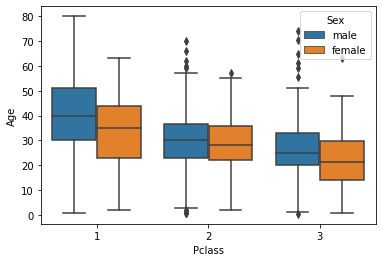

In [262]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=data[0])

In [12]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [33]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,0,0.19,22.0,1,0,7.2500,0.34,0.15,2
1,2,1,2,0.74,38.0,1,0,71.2833,0.55,0.79,2
2,3,1,0,0.74,26.0,0,0,7.9250,0.34,0.70,1
3,4,1,2,0.74,35.0,1,0,53.1000,0.34,0.79,2
4,5,0,0,0.19,35.0,0,0,8.0500,0.34,0.15,1


# Tree model

In [194]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [195]:
SexMap={'male':0, 'female':2}
EmbarkedMap={'C':2, 'Q':1, 'S':0}
TitleMap={'Mr': 0, 'Mrs':2, 'Miss':1.5, 'Master':1, 'rare':0.5}
for i in range(2):
    data[i]['Title']=data[i]['Title'].map(TitleMap)
    data[i]['Sex']=data[i]['Sex'].map(SexMap)
    data[i]['Embarked']=data[i]['Embarked'].map(EmbarkedMap)
    data[i]['Pclass']=data[i]['Pclass'].apply(lambda x: 3-x)

In [201]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,0,0,0.5,1,0,0.0,0.0,0.0,2
1,2,1,2,2,1.0,1,0,1.5,2.0,2.0,2
2,3,1,0,2,0.5,0,0,0.5,0.0,1.5,1
3,4,1,2,2,1.0,1,0,1.5,0.0,2.0,2
4,5,0,0,0,1.0,0,0,0.5,0.0,0.0,1


In [197]:
for i in range(2):    
    data[i].loc[ data[i]['Age'] <= 16, 'Age'] = 2
    data[i].loc[(data[i]['Age'] > 16) & (data[i]['Age'] <= 32), 'Age'] = 0.5
    data[i].loc[(data[i]['Age'] > 32) & (data[i]['Age'] <= 48), 'Age'] = 1
    data[i].loc[(data[i]['Age'] > 48) & (data[i]['Age'] <= 64), 'Age'] = 1.5
    data[i].loc[ data[i]['Age'] > 64, 'Age']=0

In [199]:
for i in range(2):    
    data[i].loc[ data[i]['Fare'] <= 7.91, 'Fare'] = 0
    data[i].loc[(data[i]['Fare'] > 7.91) & (data[i]['Fare'] <= 14.454), 'Fare'] = 0.5
    data[i].loc[(data[i]['Fare'] > 14.454) & (data[i]['Fare'] <= 31), 'Fare'] = 1
    data[i].loc[ data[i]['Fare'] > 31, 'Fare']=1.5

In [200]:
for i in range(2):
    data[i].fillna(data[i].mean(), inplace=True)

# Model trainning

In [202]:
X_train=data[0].drop(['Survived'], axis=1)
y_train=data[0]['Survived']
X_test=data[1]
print(X_train.shape, X_test.shape, y_train.shape)

(891, 10) (418, 10) (891,)


In [203]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier)
from xgboost import XGBClassifier as xgb
from lightgbm import LGBMClassifier as lgb

In [209]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [204]:
Score_train=np.zeros((6,1))
Score=np.zeros((6,1))
Y_test=np.zeros((6,418))

In [205]:
params=[]
param_rdf={'n_estimators':[50, 100, 200], 'max_depth':[8, 10]}
params.append(param_rdf)
param_adm={'n_estimators':[100, 200, 300, 500], 'learning_rate':[0.1, 0.2, 0.5, 1.0]}
params.append(param_adm)
param_gb={'n_estimators':[100, 200, 300, 500], 'learning_rate':[0.01, 0.1, 0.2]}
params.append(param_gb)
param_xgb={'n_estimators':[100, 200, 300, 500], 'learning_rate':[0.01, 0.1, 0.2]}
params.append(param_xgb)
param_lgbm={'n_estimators':[100, 200, 300, 500], 'learning_rate':[0.01, 0.1, 0.2]}
params.append(param_lgbm)
param_svc={'C':[0.01, 0.1, 1]}
params.append(param_svc)

In [211]:
model_name=['RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'xgb', 'lgb', 'SVC']
model=[RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, xgb, lgb, SVC]

In [207]:
for i in range(6):
    Model=model[i]()
    GridSearch=GridSearchCV(Model, params[i], cv=5, error_score='accuracy_score')
    model_name[i]=GridSearch.fit(X_train, y_train)
    print("Params: {},  Score: {} ".format(model_name[i].best_params_, model_name[i].best_score_))
    print("---------------------------------")
    y_pred=model_name[i].fit(X_train, y_train)
    Score_train[i]=accuracy_score(model_name[i].predict(X_train), y_train)
    Score[i]=model_name[i].best_score_
    Y_test[i, :]=model_name[i].predict(X_test)

Params: {'max_depth': 10, 'n_estimators': 50},  Score: 0.8114478114478114 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Params: {'learning_rate': 0.1, 'n_estimators': 100},  Score: 0.7351290684624018 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Params: {'learning_rate': 0.01, 'n_estimators': 200},  Score: 0.8035914702581369 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Params: {'learning_rate': 0.01, 'n_estimators': 200},  Score: 0.8316498316498316 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Params: {'learning_rate': 0.01, 'n_estimators': 100},  Score: 0.8361391694725028 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: T

Params: {'C': 0.01},  Score: 0.6161616161616161 
---------------------------------


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [212]:
Result=pd.DataFrame({'Model':model_name})
Result['Score_Train']=Score_train
Result['Score']=Score 
Result.set_index('Model')
Result

,Model,Score_Train,Score
0,RandomForestClassifier,0.901235,0.809203
1,AdaBoostClassifier,0.833895,0.735129
2,GradientBoostingClassifier,0.835017,0.803591
3,xgb,0.837262,0.831650
4,lgb,0.848485,0.836139
5,SVC,0.616162,0.616162


In [111]:
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [213]:
Y_test=Y_test.astype(int)
for i in range(5):
    submit=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': Y_test[i, :]})
    submit.to_csv(r'F:\pratique\titanic\ ' + model_name[i]+'.csv', index=False)

# category procces

In [ ]:
SexMap={'male':0, 'female':1}
EmbarkedMap={'C':2, 'Q':1, 'S':0}
TitleMap={'Mr': 0, 'Mrs':4, 'Miss':3, 'Master':2, 'rare':1}
for i in range(2):
    data[i]['Title']=data[i]['Title'].map(TitleMap)
    data[i]['Sex']=data[i]['Sex'].map(SexMap)
    data[i]['Embarked']=data[i]['Embarked'].map(EmbarkedMap)
    data[i]['Pclass']=data[i]['Pclass'].apply(lambda x: 3-x)

In [52]:
for i in range(2):
    data[i]['FamilySize'] = data[i] ['SibSp'] + data[i]['Parch'] + 1
    data[i]['IsAlone'] = 1
    data[i]['IsAlone'].loc[data[i]['FamilySize'] > 1] = 0

C:\Users\Phong\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
data[1].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,0,2.0,0,0,0.0,1,0.0,1,1
1,0,1,2.0,1,0,0.0,0,4.0,2,0
2,1,0,3.0,0,0,1.0,1,0.0,1,1
3,0,0,1.0,0,0,1.0,0,0.0,1,1
4,0,1,1.0,1,1,1.0,0,4.0,3,0


In [19]:
data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          417 non-null float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [20]:
data[1]['Title'].value_counts()

0.0    240
3.0     79
4.0     72
2.0     21
1.0      5
Name: Title, dtype: int64

In [21]:
for i in range(2):
    data[i]['Title']=data[i]['Title'].fillna(0)

In [23]:
for i in range(2):
    data[i]=data[i].drop('PassengerId', axis=1)

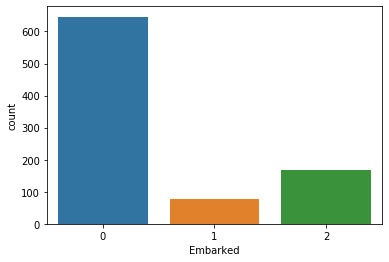

In [24]:
sns.countplot(data[0]['Embarked'])

In [25]:
for i in range(2):
    data[i].loc[data[i]['Fare']<=7.91, 'Fare']=0
    data[i].loc[(data[i]['Fare']>7.91)&(data[i]['Fare']<=14.454), 'Fare']=1
    data[i].loc[(data[i]['Fare']>14.454)&(data[i]['Fare']<=31), 'Fare']=2
    data[i].loc[(data[i]['Fare']>31), 'Fare']=3
    data[i].loc[ data[i]['Age'] <= 16, 'Age'] = 4
    data[i].loc[(data[i]['Age'] > 16) & (data[i]['Age'] <= 32), 'Age'] = 1
    data[i].loc[(data[i]['Age'] > 32) & (data[i]['Age'] <= 48), 'Age'] = 2
    data[i].loc[(data[i]['Age'] > 48) & (data[i]['Age'] <= 64), 'Age'] = 3
    data[i].loc[data[i]['Age'] > 64, 'Age']=0

###  Model

In [55]:
X_train=data[0].drop(['Survived'], axis=1)
y_train=data[0]['Survived']
X_test=data[1]
print(X_train.shape, X_test.shape, y_train.shape)

(891, 10) (418, 10) (891,)


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [31]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier)

In [56]:
model=[LogisticRegression, LinearSVC, SGDClassifier, SVC, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier]
model_name=['LogisticRegression', 'LinearSVC', 'SGDClassifier', 'SVC', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier']

In [57]:
Score=np.zeros((7,1))
ScoreVal=np.zeros((7,1))
Y_test=np.zeros((7,418))

In [58]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [367]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [62]:
Y_test=Y_test.astype(int)

In [60]:
Result=pd.DataFrame({'Model':model_name})
Result['Score_Val']=ScoreVal
Result['Score']=Score 
Result.set_index('Model')
Result

In [392]:
Y_test=Y_test

(418,)

In [61]:
Result.set_index('Model')
Result

,Model,Score_Val,Score
0,LogisticRegression,0.810325,0.824916
1,LinearSVC,0.813692,0.823793
2,SGDClassifier,0.759820,0.698092
3,SVC,0.830527,0.837262
4,RandomForestClassifier,0.803591,0.894501
5,AdaBoostClassifier,0.808081,0.821549
6,GradientBoostingClassifier,0.819304,0.856341


In [49]:
Rid=RidgeClassifier(alpha=10)
Rid.fit(X_train, y_train)
accuracy_score(Rid.predict(X_train), y_train)

0.8204264870931538

In [50]:
Y_testRid=Rid.predict(X_test)
Y_testRid=Y_testRid.astype(int)
submit=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': Y_testRid})
submit.to_csv(r'F:\pratique\titanic\Rid.csv', index=False)

In [63]:
for i in range(7):
    submit=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': Y_test[i, :]})
    submit.to_csv(r'F:\pratique\titanic\ ' + model_name[i]+'.csv', index=False)

In [41]:
Svc=SVC(C=100)
score=cross_validate(Svc, X_train, y_train, scoring='accuracy')
score['test_score'].mean()

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

0.8237934904601572

In [42]:
Svc=SVC(C=100)
Svc.fit(X_train, y_train)
accuracy_score(Svc.predict(X_train), y_train)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8911335578002245

In [43]:
Y_testSvc=Svc.predict(X_test)
Y_testSvc=Y_testSvc.astype(int)
submit=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': Y_testSvc})
submit.to_csv(r'F:\pratique\titanic\Svc100.csv', index=False)

In [59]:
for i in range(7):
    TestModel=model[i]()
    score=cross_validate(TestModel, X_train, y_train, scoring='accuracy')
    ScoreVal[i]=score['test_score'].mean()
    TestModel.fit(X_train, y_train)
    Score[i]=accuracy_score(TestModel.predict(X_train), y_train)
    y_test=TestModel.predict(X_test)
    Y_test[i,:]=y_test

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

In [317]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [327]:
model=SVC()
score=cross_validate(model, X_train, y_train, scoring='accuracy')
score['test_score'].mean()
print('_'*40)
model.predict(X_train)

________________________________________


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
for i in range(7):
    Model=model[i]()
    
    Model.fit(X_train, y_train)
    Score[i]=
    StoreTest.append(Model.score(X_test,y_test))
ScoreFinal['ScoreTrain']=StoreTrain
ScoreFinal['ScoreTest']=StoreTest  

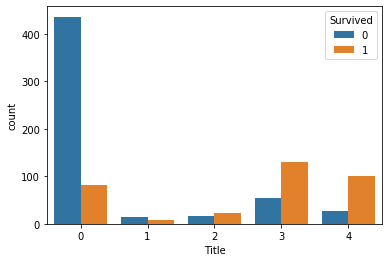

In [103]:
sns.countplot(x='Title', hue='Survived', data=data[0])

In [100]:
data[0][['Survived','Title']].groupby(['Title']).mean().sort_values(['Survived'], ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
rare,0.347826
Mr,0.156673


In [90]:
data[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,0,0,22.0,1,0,7.2500,NaN,Mr
1,2,1,2,1,38.0,1,0,71.2833,NaN,Mrs
2,3,1,0,1,26.0,0,0,7.9250,NaN,Miss
3,4,1,2,1,35.0,1,0,53.1000,NaN,Mrs
4,5,0,0,0,35.0,0,0,8.0500,NaN,Mr


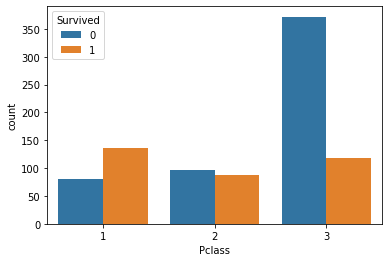

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=data[0])

C:\Users\Phong\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


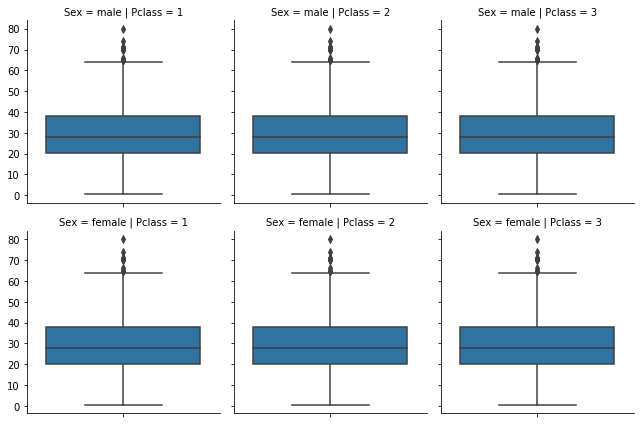

In [4]:
g=sns.FacetGrid(data[0], col='Pclass', row='Sex')
g=g.map(sns.boxplot, y=data[0]['Age'])

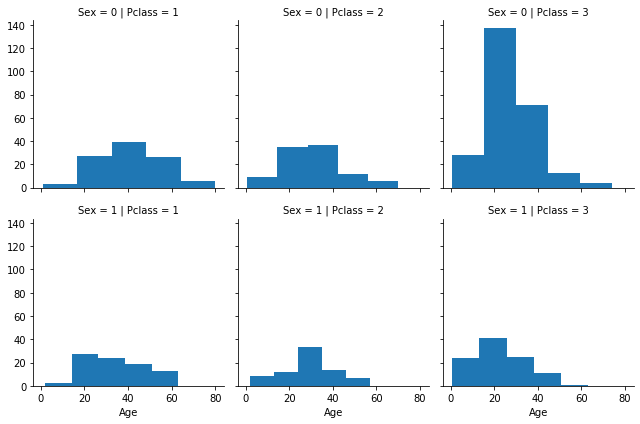

In [86]:
g=sns.FacetGrid(data[0], col='Pclass', row='Sex')
g=g.map(plt.hist, 'Age', bins=5)

In [25]:
from scipy.stats.stats import pearsonr

In [34]:
corr=data[0].corr(method='pearson')
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Survived,1.000000,0.338481,0.543351,0.131601,-0.035322,0.081629,0.295875,0.169718,0.565716
Pclass,0.338481,1.000000,0.131900,0.040825,-0.083081,-0.018443,0.628459,0.164681,0.137035
Sex,0.543351,0.131900,1.000000,0.102075,0.114631,0.245489,0.248940,0.110320,0.944195
Age,0.131601,0.040825,0.102075,1.000000,0.373708,0.306004,0.274848,0.037201,0.206343
SibSp,-0.035322,-0.083081,0.114631,0.373708,1.000000,0.414838,0.394248,-0.068900,0.202135
Parch,0.081629,-0.018443,0.245489,0.306004,0.414838,1.000000,0.393048,-0.040449,0.330014
Fare,0.295875,0.628459,0.248940,0.274848,0.394248,0.393048,1.000000,0.114286,0.316181
Embarked,0.169718,0.164681,0.110320,0.037201,-0.068900,-0.040449,0.114286,1.000000,0.098497
Title,0.565716,0.137035,0.944195,0.206343,0.202135,0.330014,0.316181,0.098497,1.000000


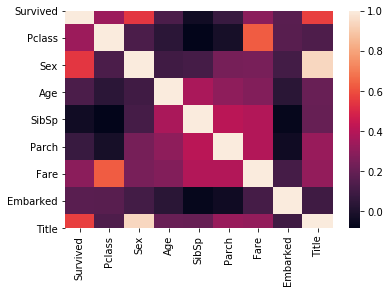

In [33]:
sns.heatmap(corr)

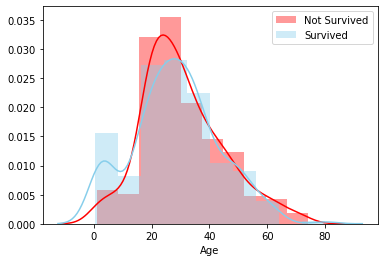

In [85]:
sns.distplot(data[0]['Age'].loc[data[0]['Survived']==0],color="red", label='Not Survived', bins=10)
sns.distplot(data[0]['Age'].loc[data[0]['Survived']==1], color="skyblue", label="Survived", bins=10)
plt.legend()

(891, 9) (416, 9) (891,)


In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate

In [25]:
LogReg=LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg.score(X_train, y_train)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8202247191011236

In [26]:
LogReg.score(X_test, y_test)

0.8156424581005587

In [22]:
LogReg2=LogisticRegression(max_iter=200)
LogReg2.fit(X_train, y_train)
LogReg2.score(X_train, y_train)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8202247191011236

In [70]:
from sklearn.model_selection import GridSearchCV

In [313]:
svcGrid.score(X_train, y_train)

0.8721910112359551

In [44]:
svcPoly=SVC(kernel='poly', degree=2)
svcPoly.fit(X, y)
svcPoly.score(X, y)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8361391694725028

In [45]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=10)
random_forest.fit(X_train, y_train)
random_forest.score(X_train, y_train)

0.8862359550561798

In [43]:
random_forest.score(X_test, y_test)

0.8212290502793296

In [29]:
AdaClass=AdaBoostClassifier(n_estimators=100)
AdaClass.fit(X_train, y_train)
AdaClass.score(X_train, y_train)

0.8188202247191011

In [30]:
AdaClass.score(X_test, y_test)

0.8212290502793296

In [31]:
GradBoos=GradientBoostingClassifier(n_estimators=100)
GradBoos.fit(X_train, y_train)
GradBoos.score(X_train, y_train)

0.8581460674157303

In [32]:
GradBoos.score(X_test, y_test)

0.8268156424581006

In [37]:
SupoClass=SVC()
SupoClass.fit(X_train, y_train)
SupoClass.score(X_train, y_train)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8314606741573034

In [38]:
SupoClass.score(X_test, y_test)

0.8324022346368715

In [46]:
y_pred=random_forest.predict(X_final)

In [47]:
y_pred.shape

(418,)

In [182]:
test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [48]:
submit=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived': y_pred})
submit.to_csv(r'F:\pratique\titanic\SubmitRandF.csv', index=False)

In [173]:
random_forest.score(X_test, y_test)

0.8044692737430168

In [64]:
roc_auc_score(y_pred_RanFor, y_train)

0.9257548552742287

In [93]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [94]:
GradBoos=GradientBoostingClassifier()
GradBoos.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [95]:
GradBoos.score(X_train, y_train)

0.9058988764044944

In [96]:
GradBoos.score(X_test, y_test)

0.8100558659217877

In [98]:
AdamBoos=AdaBoostClassifier()
AdamBoos.fit(X_train, y_train)
print(AdamBoos.score(X_train, y_train), AdamBoos.score(X_test, y_test))

0.8370786516853933 0.8044692737430168


In [88]:
Vt=VotingClassifier(estimators=[('Lr',LogReg), ('Rf', random_forest), ('Svc',svcGrid)], voting='hard')

In [89]:
Vt.fit(X_train, y_train)

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better f

VotingClassifier(estimators=[('Lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [92]:
Vt.score(X_train, y_train)

0.8735955056179775

In [126]:
Score=[accuracy_score,  precision_score, recall_score,f1_score, roc_auc_score]
Score_name=['accuracy_score', 'precision_score', 'recall_score','f1_score', 'roc_auc_score']

In [1]:
ScoreFinal=pd.DataFrame({'Model':model_name})
ScoreFinal

NameError: name 'pd' is not defined

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [169]:
ScoreFinal.set_index('Model')

,ScoreTrain,ScoreTest
Model,,
LogisticRegression,0.820225,0.815642
SVC,0.870787,0.776536
RandomForestClassifier,0.950843,0.782123
AdaBoostClassifier,0.837079,0.804469
GradientBoostingClassifier,0.904494,0.815642


In [148]:
for i in range(5):
    Model=model[i]()
    Model.fit(X_train, y_train)
    y_pred=Model.predict(X_train)
    StoreScore=[]
    for j in range(5):
        StoreScore.append(Score[j](y_pred,y_train))
    ScoreFinal[model_name[i]]=StoreScore
        

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [151]:
ScoreFinal.set_index('Score Name')

,LogisticRegression,SVC,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Score Name,,,,,
accuracy_score,0.820225,0.870787,0.948034,0.837079,0.904494
precision_score,0.738971,0.816176,0.908088,0.790441,0.830882
recall_score,0.779070,0.840909,0.953668,0.784672,0.911290
f1_score,0.758491,0.828358,0.930320,0.787546,0.869231
roc_auc_score,0.811341,0.864651,0.949240,0.827267,0.906076


In [162]:
ScoreFinal.max(axis=0)

Score Name                    roc_auc_score
LogisticRegression                 0.820225
SVC                                0.870787
RandomForestClassifier             0.953668
AdaBoostClassifier                 0.837079
GradientBoostingClassifier          0.91129
dtype: object

In [159]:
ScoreFinal.sort_values(by=['RandomForestClassifier'])

,Score Name,LogisticRegression,SVC,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
1,precision_score,0.738971,0.816176,0.908088,0.790441,0.830882
3,f1_score,0.758491,0.828358,0.930320,0.787546,0.869231
0,accuracy_score,0.820225,0.870787,0.948034,0.837079,0.904494
4,roc_auc_score,0.811341,0.864651,0.949240,0.827267,0.906076
2,recall_score,0.779070,0.840909,0.953668,0.784672,0.911290


In [413]:
score[2]

<function sklearn.metrics.classification.recall_score>

In [414]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
Score=[]    
for j in range(len(ScoreName)):
    Score.append(score[j](y_train, y_pred))
score_final['LogisticRegression']=Score

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [415]:
score_final

,LinReg,Score Name,LogisticRegression
0,0,accuracy_score,0.815937
1,0,precision_score,0.781646
2,0,recall_score,0.722222
3,0,f1_score,0.750760
4,0,roc_auc_score,0.798270


In [416]:
model=SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
Score=[]    
for j in range(len(ScoreName)):
    Score.append(score[j](y_train, y_pred))
score_final['SVC']=Score

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [164]:
param={'C':[10**(i-2) for i in (range(4))], 'gamma':[10**(-i) for i in range(4)]}
param

{'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}

In [160]:
param={'C': [1, 10, 100, 1000]}

In [165]:
svc=SVC(kernel='rbf')

In [417]:
score_final

,LinReg,Score Name,LogisticRegression,SVC
0,0,accuracy_score,0.815937,0.842873
1,0,precision_score,0.781646,0.836667
2,0,recall_score,0.722222,0.733918
3,0,f1_score,0.750760,0.781931
4,0,roc_auc_score,0.798270,0.822332


In [387]:
score_final

,LinReg,Score Method,SVC
0,0.815937,accuracy_score,0.842873
1,0.750760,precision_score,0.781931
2,0.722222,recall_score,0.733918
3,0.781646,f1_score,0.836667
4,0.808214,roc_auc_score,0.841345


In [104]:
rdfr=RandomForestClassifier(n_estimators=60)
rdfr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
y_pred=model.predict(X_train)
acc=accuracy_score(y_train, y_pred)
acc

0.898989898989899

In [85]:
np.linspace(40, 200, 9, dtype='int')

array([ 40,  60,  80, 100, 120, 140, 160, 180, 200])

In [158]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':np.linspace(40, 200, 9, dtype='int')}
GridSearchCV=GridSearchCV(rdfr, param_grid=param, error_score='accuracy_score',cv=5)

In [91]:
GridSearchCV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='accuracy_score',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 40,  60,  80, 100, 120, 140, 160, 180, 200])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
y_prob=GridSearchCV.predict_proba(X_train)

In [103]:
GridSearchCV.best_params_

{'n_estimators': 60}

In [99]:
y_pred=GridSearchCV.predict(X_train)

In [100]:
accuracy_score(y_train, y_pred)

0.898989898989899

In [97]:
GridSearchCV.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [98]:
GridSearchCV.get_params()

{'cv': 5,
 'error_score': 'accuracy_score',
 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'estimator__bootstrap': True,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_

In [72]:
y_prob[:5]

array([[0.86560403, 0.13439597],
       [0.        , 1.        ],
       [0.58034012, 0.41965988],
       [0.        , 1.        ],
       [0.86437387, 0.13562613]])

In [75]:
y_thres=(y_prob[:,1]>0.6).astype('int')

In [107]:
accuracy_score(y_thres, y_train)

0.898989898989899

In [456]:
dump(model, 'saverdfrt.joblib')

['saverdfrt.joblib']

In [457]:
randomfrt=load('saverdfrt.joblib')

In [462]:
y_pred2=randomfrt.predict(X_train)

In [466]:
y_pred2.shape

(891,)

In [419]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
Score=[]    
for j in range(len(ScoreName)):
    Score.append(score[j](y_train, y_pred))
score_final['DecisionTree']=Score


In [421]:
model=KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
Score=[]    
for j in range(len(ScoreName)):
    Score.append(score[j](y_train, y_pred))
score_final['KNN']=Score

In [422]:
model=LinearSVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
Score=[]    
for j in range(len(ScoreName)):
    Score.append(score[j](y_train, y_pred))
score_final['LinearSVC']=Score

C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [423]:
model=SGDClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
Score=[]    
for j in range(len(ScoreName)):
    Score.append(score[j](y_train, y_pred))
score_final['SGD Classification']=Score


C:\Users\Phong\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [427]:
score_final.columns

Index(['LinReg', 'Score Name', 'LogisticRegression', 'SVC', 'RandomForest',
       'DecisionTree', 'KNN', 'LinearSVC', 'SGD Classification'],
      dtype='object')

In [ ]:
model=[]

In [430]:
score_final=score_final.drop('LinReg', axis=1)

In [431]:
score_final.set_index('Score Name')

,LogisticRegression,SVC,RandomForest,DecisionTree,KNN,LinearSVC,SGD Classification
Score Name,,,,,,,
accuracy_score,0.815937,0.842873,0.901235,0.901235,0.856341,0.820426,0.693603
precision_score,0.781646,0.836667,0.912338,0.944056,0.836478,0.791667,0.568047
recall_score,0.722222,0.733918,0.821637,0.789474,0.777778,0.722222,0.842105
f1_score,0.750760,0.781931,0.864615,0.859873,0.806061,0.755352,0.678445
roc_auc_score,0.798270,0.822332,0.886229,0.880165,0.841530,0.801913,0.721599


In [437]:
score_final

,0,1,2,3,4
Score Name,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
LogisticRegression,0.815937,0.781646,0.722222,0.75076,0.79827
SVC,0.842873,0.836667,0.733918,0.781931,0.822332
RandomForest,0.901235,0.912338,0.821637,0.864615,0.886229
DecisionTree,0.901235,0.944056,0.789474,0.859873,0.880165
KNN,0.856341,0.836478,0.777778,0.806061,0.84153
LinearSVC,0.820426,0.791667,0.722222,0.755352,0.801913
SGD Classification,0.693603,0.568047,0.842105,0.678445,0.721599


In [438]:
score_final.columns=Score_name

In [446]:
score_final=score_final.drop('Score Name', axis=0)

In [449]:
score_final.sort_values(by='accuracy_score', ascending=False)

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
RandomForest,0.901235,0.912338,0.821637,0.864615,0.886229
DecisionTree,0.901235,0.944056,0.789474,0.859873,0.880165
KNN,0.856341,0.836478,0.777778,0.806061,0.84153
SVC,0.842873,0.836667,0.733918,0.781931,0.822332
LinearSVC,0.820426,0.791667,0.722222,0.755352,0.801913
LogisticRegression,0.815937,0.781646,0.722222,0.75076,0.79827
SGD Classification,0.693603,0.568047,0.842105,0.678445,0.721599


In [452]:
from sklearn.externals.joblib import dump, load
